In [1]:
import weathercom
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
model = keras.models.load_model('ann_regr_weather.h5')
from dataframe_wrangling import is_holiday, is_workday, season
import datetime
import joblib

In [2]:
# TODO: Automatically take it from G calendar API
HOLIDAYS = [datetime.date(2020,4,19), datetime.date(2021,1,1), datetime.date(2021,3,3),datetime.date(2020,5,1),
            datetime.date(2020,5,6),datetime.date(2020,5,24),datetime.date(2020,9,6),
            datetime.date(2020,9,22),datetime.date(2020,12,24),datetime.date(2020,12,25),datetime.date(2020,12,26)]

In [3]:
sc_regr = joblib.load('std_scaler.bin')

In [4]:
data = weathercom.getCityWeatherDetails(city='Sofia',queryType="ten-days-data")

This would be an input to the ANN to estimate the air quality for the next few days

In [5]:
df = pd.read_json(data)
weather = pd.DataFrame()
date = pd.DataFrame()

In [6]:
weather['Temperature'] = df['vt1dailyForecast']['day']['temperature']
weather['Humidity'] = df['vt1dailyForecast']['day']['humidityPct']

In [7]:
date['Date'] = pd.to_datetime(df['vt1dailyForecast']['validDate'])

In [8]:
weather['IsHoliday'] = date['Date'].apply(is_holiday)
weather['Weekday'] = date['Date'].dt.dayofweek
weather['Season'] = date['Date'].apply(season)

In [9]:
weather = sc_regr.transform(weather)

In [10]:
prediction = model.predict(weather)

Text(0, 0.5, 'PM 10')

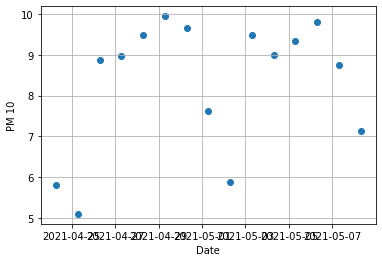

In [11]:
plt.scatter(date['Date'], prediction)
plt.grid()
plt.xlabel('Date')
plt.ylabel('PM 10')